In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

In [44]:
kernel1 = np.array([[-1,-1,-1],[-1,8,-1], [-1,-1,-1]])
kernel2 = np.array([[0,-1,0], [-1,8,-1],[0,-1,0]])

In [45]:
def convolution(arr, kernel):
  result = np.zeros((arr.shape[0], arr.shape[1]))
  npImg = np.pad(arr, kernel.shape[0]-2, mode='edge')
  for x in range(arr.shape[0]):
    for y in range(arr.shape[1]):
      final = npImg[x:x+kernel.shape[0], y:y+kernel.shape[1]]
      result[x,y] = np.sum(np.multiply(final, kernel))
  return result

In [46]:
import numpy as np
from PIL import Image
im = Image.open('geometricImageLatest.jpg')
rgb = np.array(im.convert('RGB'))
r=rgb [:,:,0]
Image.fromarray(convolution(r,kernel1)).show()

170498071/170498071 [==============================] - 6s 0us/step
orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                 

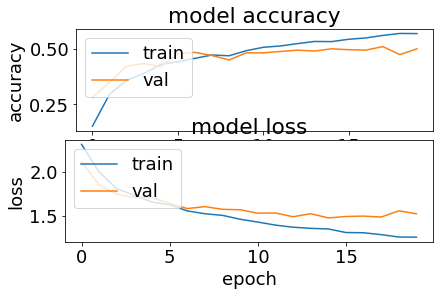

157/157 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       505
           1       0.76      0.72      0.74       460
           2       0.40      0.69      0.51       519
           3       0.60      0.41      0.48       486
           4       0.60      0.32      0.42       519
           5       0.70      0.40      0.51       488
           6       0.59      0.70      0.64       518
           7       0.69      0.63      0.66       486
           8       0.64      0.69      0.67       520
           9       0.76      0.66      0.71       498

    accuracy                           0.60      4999
   macro avg       0.62      0.60      0.59      4999
weighted avg       0.62      0.60      0.59      4999

[[369  14  30   2   8   1   1   8  63   9]
 [ 23 333   6   2   5   1   6   3  44  37]
 [ 46   7 359  14  14  10  31  14  19   5]
 [ 19   6  87 198  21  33  75  21  13  13]
 [ 50   5 184

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range, normalising img
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier().fit(x_train, y_train)
ydummy = dummy.predict(x_test)
print(confusion_matrix(y_test.argmax(axis=1), ydummy.argmax(axis=1)))
print(classification_report(y_test, ydummy))

[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


orig x_train shape: (9999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)

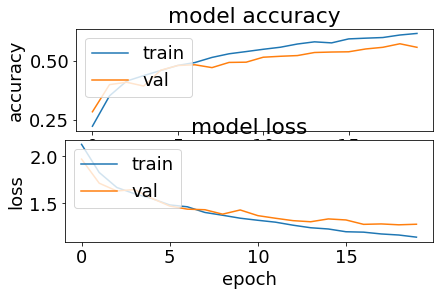

313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1005
           1       0.73      0.81      0.77       974
           2       0.62      0.48      0.54      1032
           3       0.61      0.49      0.54      1016
           4       0.59      0.59      0.59       999
           5       0.69      0.53      0.60       937
           6       0.68      0.74      0.71      1029
           7       0.65      0.79      0.71      1001
           8       0.68      0.84      0.76      1025
           9       0.74      0.71      0.72       981

    accuracy                           0.67      9999
   macro avg       0.67      0.67      0.66      9999
weighted avg       0.67      0.67      0.66      9999

[[692  28  45  10  22   4   5  16 156  27]
 [ 26 793   2   2   5   4  11   2  51  78]
 [ 59  20 499  45 144  46  81  74  47  17]
 [ 23  17  69 498  77  93 106  81  28  24]
 [ 40   5  64

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=10000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense

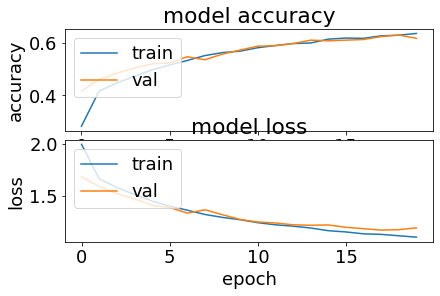

625/625 [==============================] - 7s 10ms/step
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1989
           1       0.83      0.79      0.81      1981
           2       0.57      0.64      0.61      2042
           3       0.51      0.57      0.54      2011
           4       0.66      0.55      0.60      2009
           5       0.55      0.66      0.60      1925
           6       0.88      0.61      0.72      2037
           7       0.77      0.73      0.75      2027
           8       0.71      0.83      0.76      2012
           9       0.80      0.74      0.77      1966

    accuracy                           0.68     19999
   macro avg       0.70      0.68      0.69     19999
weighted avg       0.70      0.68      0.69     19999

[[1437   27   77   48   21   19    2   32  273   53]
 [  46 1562   15   16   15   12   10   12  115  178]
 [ 147   11 1311  136  119  150   35   64   54   15]
 [  48   10  160 1149   83

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=20000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense

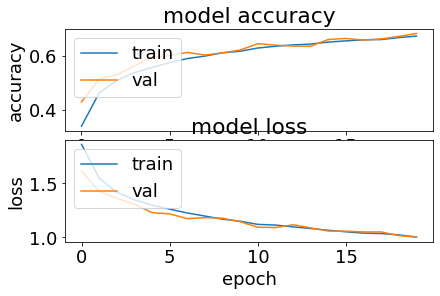

1250/1250 [==============================] - 14s 11ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      3986
           1       0.85      0.85      0.85      3986
           2       0.68      0.58      0.63      4048
           3       0.50      0.66      0.57      3984
           4       0.69      0.66      0.68      4003
           5       0.63      0.65      0.64      3975
           6       0.77      0.78      0.78      4019
           7       0.82      0.73      0.78      4023
           8       0.85      0.81      0.83      3997
           9       0.81      0.82      0.81      3978

    accuracy                           0.73     39999
   macro avg       0.74      0.73      0.73     39999
weighted avg       0.74      0.73      0.73     39999

[[3004   82  165  147   64   44   27   33  267  153]
 [  68 3396   32   51   10   10   33   12   68  306]
 [ 239   10 2341  431  313  246  269  105   62   32]
 [  39   14  172 2629  

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=40000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (4999, 32, 32, 3)
This is for penalty: 0
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                           

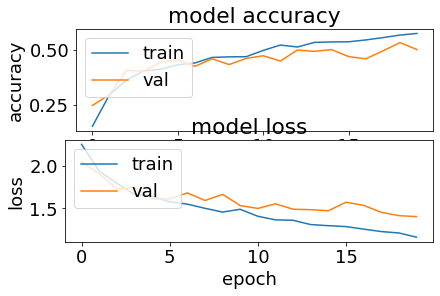

157/157 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       505
           1       0.72      0.76      0.74       460
           2       0.57      0.52      0.54       519
           3       0.54      0.53      0.54       486
           4       0.48      0.60      0.53       519
           5       0.63      0.50      0.56       488
           6       0.64      0.72      0.67       518
           7       0.74      0.57      0.64       486
           8       0.64      0.79      0.71       520
           9       0.75      0.63      0.69       498

    accuracy                           0.62      4999
   macro avg       0.63      0.62      0.62      4999
weighted avg       0.63      0.62      0.62      4999

[[314  15  25   6  22   0   8   7  96  12]
 [ 15 349   1   3  10   2   8   3  38  31]
 [ 38   5 268  26  85  28  32  15  17   5]
 [  8   3  30 258  47  49  52  11  11  17]
 [ 25   3  53 

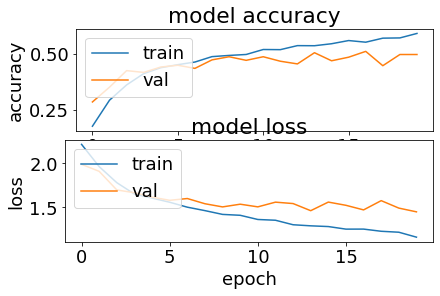

157/157 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       505
           1       0.85      0.59      0.70       460
           2       0.56      0.58      0.57       519
           3       0.56      0.54      0.55       486
           4       0.58      0.57      0.58       519
           5       0.64      0.61      0.62       488
           6       0.68      0.67      0.67       518
           7       0.70      0.65      0.68       486
           8       0.65      0.76      0.70       520
           9       0.71      0.70      0.70       498

    accuracy                           0.64      4999
   macro avg       0.65      0.64      0.64      4999
weighted avg       0.65      0.64      0.64      4999

[[377   3  14   5   6   5   4   9  67  15]
 [ 25 271   4   3  10   3  12   5  48  79]
 [ 46   2 301  21  52  24  29  20  19   5]
 [ 10   1  38 262  32  52  49  23  12   7]
 [ 35   2  66

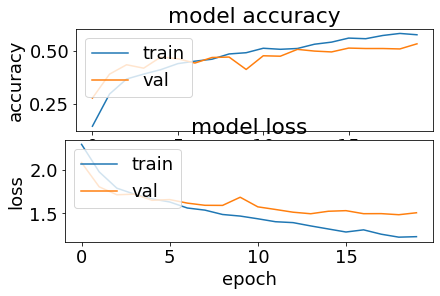

157/157 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       505
           1       0.82      0.64      0.72       460
           2       0.52      0.61      0.56       519
           3       0.56      0.57      0.57       486
           4       0.54      0.52      0.53       519
           5       0.58      0.65      0.61       488
           6       0.71      0.68      0.69       518
           7       0.66      0.67      0.66       486
           8       0.77      0.65      0.70       520
           9       0.65      0.79      0.71       498

    accuracy                           0.64      4999
   macro avg       0.65      0.64      0.64      4999
weighted avg       0.65      0.64      0.64      4999

[[310  14  39  12  21   5   4  19  47  34]
 [  9 295   7   2   9   7  15   7  24  85]
 [ 19   3 318  33  49  40  19  24   4  10]
 [  4   0  36 277  30  65  33  21   2  18]
 [ 18   1  94

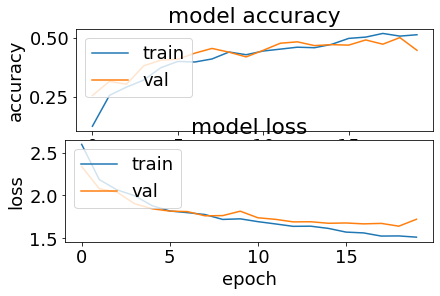

157/157 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.68      0.39      0.49       505
           1       0.68      0.68      0.68       460
           2       0.50      0.52      0.51       519
           3       0.41      0.48      0.45       486
           4       0.48      0.49      0.48       519
           5       0.41      0.67      0.51       488
           6       0.62      0.57      0.60       518
           7       0.68      0.51      0.58       486
           8       0.79      0.49      0.60       520
           9       0.54      0.73      0.62       498

    accuracy                           0.55      4999
   macro avg       0.58      0.55      0.55      4999
weighted avg       0.58      0.55      0.55      4999

[[196  35  65  21  45  19   5  14  43  62]
 [  1 315   3   8   9  14  10   4  13  83]
 [  6   6 269  42  57  71  34  21   2  11]
 [  1   7  23 234  19 134  39   9   1  19]
 [  7   4  74

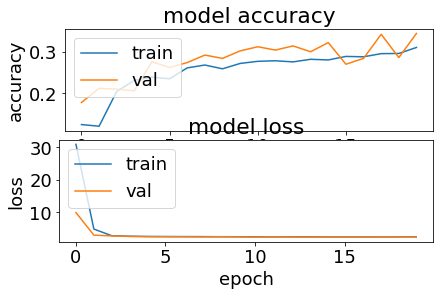

157/157 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.42      0.27      0.33       505
           1       0.41      0.53      0.46       460
           2       0.26      0.13      0.17       519
           3       0.29      0.17      0.22       486
           4       0.25      0.60      0.36       519
           5       0.29      0.25      0.27       488
           6       0.56      0.18      0.27       518
           7       0.46      0.32      0.38       486
           8       0.34      0.64      0.45       520
           9       0.48      0.41      0.44       498

    accuracy                           0.35      4999
   macro avg       0.38      0.35      0.33      4999
weighted avg       0.38      0.35      0.33      4999

[[136  56   4   5  21   5   0  31 217  30]
 [ 20 244   7  12  12   8   9   8  89  51]
 [ 32  24  67  15 230  47   3  23  68  10]
 [ 14  38  41  83 111  93  24  16  48  18]
 [ 21   9  19

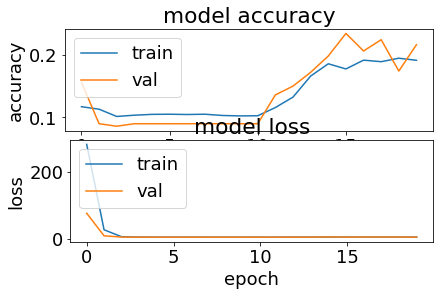

157/157 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.25      0.75      0.37       505
           1       0.47      0.08      0.13       460
           2       0.08      0.14      0.10       519
           3       0.00      0.00      0.00       486
           4       1.00      0.00      0.00       519
           5       0.26      0.14      0.18       488
           6       0.20      0.86      0.33       518
           7       0.00      0.00      0.00       486
           8       0.17      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.20      4999
   macro avg       0.24      0.20      0.11      4999
weighted avg       0.24      0.20      0.11      4999

[[379   7  69   0   0  11  39   0   0   0]
 [137  35 128   0   0  34 123   0   3   0]
 [109   1  73   0   0  32 304   0   0   0]
 [ 69   2  91   0   0  47 277   0   0   0]
 [ 64   0  70

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.25      0.77      0.37      1000
           1       0.46      0.08      0.14      1000
           2       0.08      0.16      0.11      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.25      0.13      0.17      1000
           6       0.20      0.88      0.33      1000
           7       0.00      0.00      0.00      1000
           8       0.08      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.13      0.20      0.11     10000
weighted avg       0.13      0.20      0.11     10000

[[765   8 115   0   0  21  91   0   0   0]
 [324  84 268   0   0  81 239   0   3   1]
 [216   8 161   0   0  66 549   0   0   0]
 [140  12 185   0   0 102 560   0   1   0]
 [117   2 144

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/20
36/36 [==============================] - 4s 103ms/step - loss: 2872.9739 - accuracy: 0.1116 - val_loss: 773.0322 - val_accuracy: 0.1380
Epoch 2/20
36/36 [==============================] - 4s 123ms/step - loss: 254.9641 - accuracy: 0.1134 - val_loss: 67.7678 - val_accuracy: 0.0880
Epoch 3/20
36/36 [==============================] - 4s 99ms/step - loss: 40.1183 - accuracy: 0.1056 - val_loss: 29.4238 - val_accuracy: 0.0880
Epoch 4/20
36/36 [==============================] - 4s 99ms/step - loss: 28.0716 - accuracy: 0.1056 - val_loss: 27.8215 - val_accuracy: 0.0880
Epoch 5/20
36/36 [==============================] - 4s 99ms/step - loss: 27.4875 - accuracy: 0.1056 - val_loss: 27.4992 - val_accuracy: 0.0880
Epoch 6/20
36/36 [==============================] - 4s 98ms/step - loss: 27.3771 - accuracy: 0.1056 - val_loss: 27.3024 - val_accuracy: 0.0880
Epoch 7/20
36/36 [==============================] - 4s 97ms/step - loss: 27.2826 - accuracy: 0.1056 - val_loss: 27.1403 - val_accuracy: 

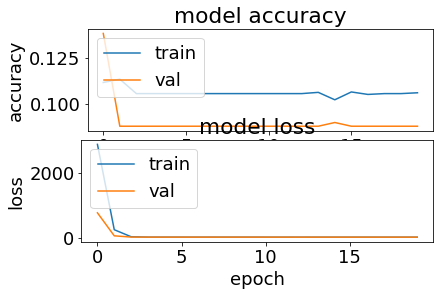

157/157 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 486   0   0   0   0   0]
 [  0   0   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/20
36/36 [==============================] - 4s 106ms/step - loss: 28414.2031 - accuracy: 0.1180 - val_loss: 7504.3906 - val_accuracy: 0.1860
Epoch 2/20
36/36 [==============================] - 4s 99ms/step - loss: 2476.5977 - accuracy: 0.1162 - val_loss: 642.9018 - val_accuracy: 0.0960
Epoch 3/20
36/36 [==============================] - 4s 99ms/step - loss: 377.3553 - accuracy: 0.1025 - val_loss: 271.6887 - val_accuracy: 0.0900
Epoch 4/20
36/36 [==============================] - 4s 100ms/step - loss: 259.5567 - accuracy: 0.1040 - val_loss: 258.4359 - val_accuracy: 0.0900
Epoch 5/20
36/36 [==============================] - 4s 100ms/step - loss: 254.0768 - accuracy: 0.1036 - val_loss: 253.8173 - val_accuracy: 0.0900
Epoch 6/20
36/36 [==============================] - 4s 123ms/step - loss: 253.0166 - accuracy: 0.1031 - val_loss: 252.3354 - val_accuracy: 0.0900
Epoch 7/20
36/36 [==============================] - 4s 98ms/step - loss: 252.2184 - accuracy: 0.1022 - val_loss: 252.4509 

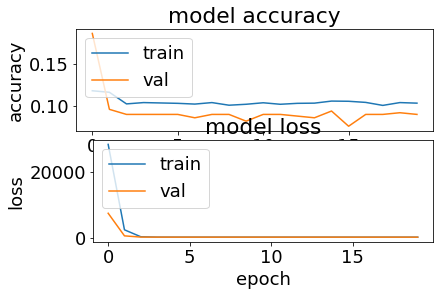

157/157 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.10      0.44      0.16       519
           3       0.00      0.00      0.00       486
           4       0.14      0.71      0.23       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.12      4999
   macro avg       0.02      0.11      0.04      4999
weighted avg       0.02      0.12      0.04      4999

[[  0   0 300   0 205   0   0   0   0   0]
 [  0   0 255   0 205   0   0   0   0   0]
 [  0   0 226   0 293   0   0   0   0   0]
 [  0   0 223   0 263   0   0   0   0   0]
 [  0   0 152

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.09      0.43      0.15      1000
           3       0.00      0.00      0.00      1000
           4       0.13      0.67      0.21      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.02      0.11      0.04     10000
weighted avg       0.02      0.11      0.04     10000

[[  0   0 619   0 381   0   0   0   0   0]
 [  0   0 539   0 461   0   0   0   0   0]
 [  0   0 433   0 567   0   0   0   0   0]
 [  0   0 463   0 537   0   0   0   0   0]
 [  0   0 330

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
  penalty = [0,0.00001,0.0001,0.001,0.1,1,10,100]
  for i in penalty:
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    print(f'This is for penalty: {i}')
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(i)))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    preds = model.predict(x_train)
    y_pred = np.argmax(preds, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(classification_report(y_train1, y_pred))
    print(confusion_matrix(y_train1,y_pred))

    preds = model.predict(x_test)
    y_pred = np.argmax(preds, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred))
    print(confusion_matrix(y_test1,y_pred))
    print(f'This is where penalty {i} ends')

In [41]:
def kerasModel():
  model = keras.Sequential()
  model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
  model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
  model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
  model.summary()

  batch_size = 128
  epochs = 20
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  model.save("cifar.model")
  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  return model

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_74 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_75 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 32)         0         
 2D)           

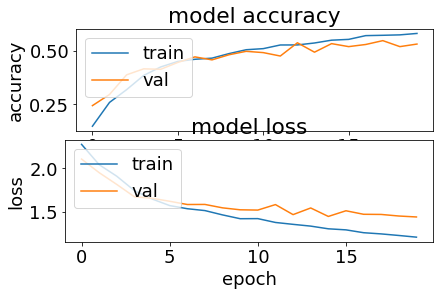

157/157 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       505
           1       0.73      0.75      0.74       460
           2       0.54      0.54      0.54       519
           3       0.46      0.68      0.55       486
           4       0.61      0.56      0.58       519
           5       0.67      0.53      0.59       488
           6       0.80      0.58      0.67       518
           7       0.70      0.65      0.67       486
           8       0.69      0.75      0.72       520
           9       0.62      0.79      0.70       498

    accuracy                           0.64      4999
   macro avg       0.66      0.64      0.64      4999
weighted avg       0.66      0.64      0.64      4999

[[292  18  30  10  13   0   3  10  87  42]
 [  4 345   5   3   2   0   7   4  28  62]
 [ 20   6 279  57  56  30  22  24  13  12]
 [  3   5  31 332  25  28  17  14   6  25]
 [ 11  11  63

In [42]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range, normalising img
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
  maxpoolModel = kerasModel()


preds = maxpoolModel.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = maxpoolModel.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))